In [1]:
#import pandas as pd
#from google.colab import drive
#drive.mount('/content/drive')
#df = pd.read_csv("/content/drive/MyDrive/dmg ass3/covtype_train.csv")

In [2]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler, normalize
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import sklearn.metrics
from collections import Counter


# Load the CSV file from local
df = pd.read_csv("covtype_train.csv")
df.drop_duplicates(keep=False,inplace=True)


df = df.astype({"Elevation":'category','Aspect':'category','Slope':'category','Hillshade_9am':'category','Hillshade_Noon':'category','Horizontal_Distance_To_Fire_Points':'category'})
for c in df.columns:
    df[c] = df[c].astype('category').cat.codes
print(df.shape)
newdf=df
#newdf.drop(columns='target')




(2239, 11)


In [3]:
newdf[df.columns[:-1]]

,Elevation,Aspect,Slope,Hillshade_9am,Hillshade_Noon,Horizontal_Distance_To_Hydrology,Vertical_Distance_To_Hydrology,Horizontal_Distance_To_Fire_Points,Soil_Type,Wilderness
421,1,3,1,0,0,1,1,1,1,3
954,2,1,2,0,0,1,2,1,21,2
1278,2,2,2,0,0,1,1,0,23,0
1505,2,1,1,0,0,2,1,1,30,2
1567,1,3,2,1,0,0,1,1,9,3
...,...,...,...,...,...,...,...,...,...,...
405630,0,0,1,0,0,2,2,1,3,2
405688,2,1,2,0,0,1,1,1,19,0
405828,0,3,1,0,0,3,0,2,28,0
405883,1,3,1,0,0,0,1,1,2,2


In [4]:
point = []
K = range(1,10)
for k in K:
    kmeanModel = KMeans(n_clusters=k)
    kmeanModel.fit(newdf[df.columns[:-1]])
    point.append(kmeanModel.inertia_)

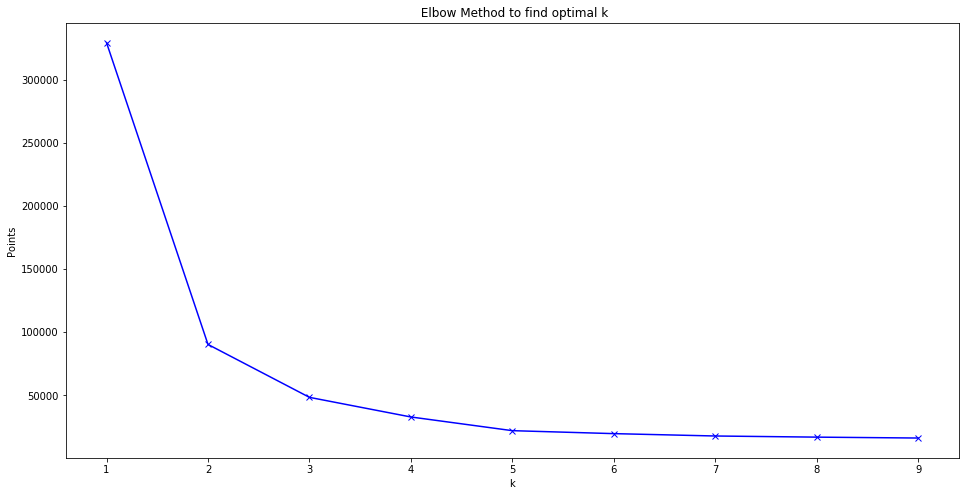

In [5]:
plt.figure(figsize=(16,8))
plt.plot(K, point,'bx-')
plt.xlabel('k')
plt.ylabel('Points')
plt.title(' Elbow Method to find optimal k')
plt.show()

In [6]:
#for k=7
reduced_data = PCA(n_components=2).fit_transform(newdf)
kmeans = KMeans( n_clusters=7).fit(newdf[df.columns[:-1]])
kmeans.fit(reduced_data)
labels=kmeans.predict(reduced_data)
centroids = kmeans.cluster_centers_
print(centroids)


[[ -5.23199697  -0.45147891]
 [ 20.29885041   0.89872538]
 [-15.20524395   4.57871685]
 [  1.49070612  -1.06205232]
 [-15.30145219  -1.26829603]
 [ 11.71131094   0.05696065]
 [ -8.76109198  -0.31730348]]


Comparison of true labels with cluster distributions Q1(3Part)

In [7]:
#Giving clusters labels according to the majority data points belonging there
predicted_clusters=kmeans.predict(reduced_data)
cluster_labels = []
for i in range(kmeans.n_clusters):
  dist = np.unique(df['target'][predicted_clusters==i], return_counts=True)
  #print(dist)
  cluster_labels.append(dist[0][np.argmax(dist[1])])
cluster_labels

[1, 2, 6, 1, 0, 1, 1]

In [8]:
#Giving predicted clusters labels according to the cluster they belong
predict_labels_data = np.array([cluster_labels[i] for i in predicted_clusters])
predict_labels_data

array([2, 1, 1, ..., 1, 2, 0], dtype=int8)

In [9]:
sklearn.metrics.accuracy_score(df['target'], predict_labels_data)


0.5252344796784278

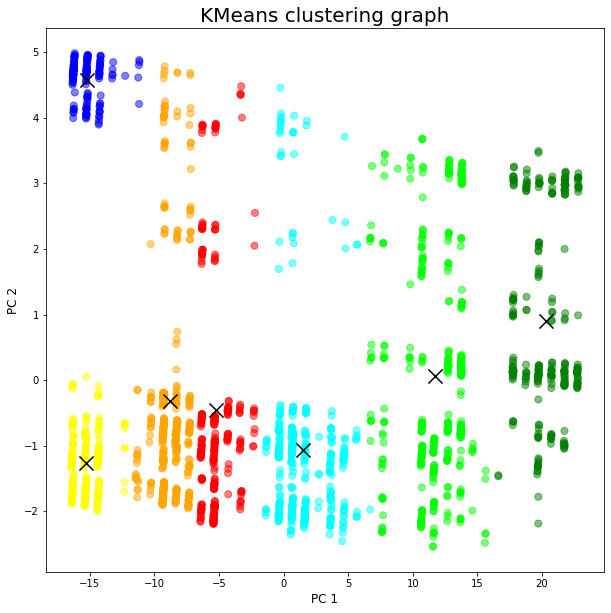

In [10]:
kmean= PCA(n_components=2)
kmean_fit = kmean.fit(newdf)
pc = kmean_fit.transform(newdf)


pDf = pd.DataFrame(data = pc, columns = ['pc1', 'pc2'])

colors =['red','green','blue','cyan','yellow', 'lime','orange']
#centroidColor= []
#for item in range(7):
#  centroidColor.append(colors[item])

point=[]
for row in labels:
  point.append(colors[row])

fig = plt.figure(figsize = (10,10))
plot = fig.add_subplot(1,1,1) 
plot.set_xlabel('PC 1', fontsize = 12)
plot.set_ylabel('PC 2', fontsize = 12)
plot.set_title('KMeans clustering graph', fontsize = 20)
plt.scatter(pDf['pc1'], pDf['pc2'],c=point, s=50, alpha=0.5)
#centroids = kmeans.transform(centroids)
plt.scatter(centroids[:, 0], centroids[:, 1], c="black", s=200, marker=('x'))
plt.show()


Q3 part count of true value and predicted value

In [11]:
c = Counter( df.target)
print( c.items() )

dict_items([(3, 38), (1, 781), (6, 233), (4, 135), (5, 149), (2, 197), (0, 706)])


In [12]:
c = Counter( predict_labels_data)
print( c.items() )

dict_items([(2, 280), (1, 1553), (6, 163), (0, 243)])
